In [1]:
import pandas as pd
import numpy as np


In [2]:
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/WIN10/Downloads/dsbda_codes-main/dsbda_codes-main/Datasets/StudentsPerformance.csv")

In [4]:
df

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none        72.0           72.0           74.0  
1                 completed        69.0           90.0           88.0  
2                      none        90.0           95.0           93.0  
3                      none        47.0           57.0            NaN  
4                      none        76.0           78.0           75.0  
..                      ...         ...            ...            ...  
995               completed        88.0           99.0           95.0  
996                    none        62.0           55.0           55.0  
997               completed        59.0           71.0           65.0  
998               completed        68.0           78.0            NaN  
999                    none        77.0           86.0           86.0  

[1000 rows x 8 columns]

In [5]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none        72.0           72.0           74.0  
1               completed        69.0           90.0           88.0  
2                    none        90.0           95.0           93.0  
3                    none        47.0           57.0            NaN  
4                    none        76.0           78.0           75.0

In [6]:
outliers=[]
def detect_outliers(df):
    threshold=3
    mean=np.mean(df)
    std=np.std(df)
    for i in df:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers
outliers

[]

In [7]:
def remove_outliers_zscore(df,threshold=3):
    zscore=(np.abs(df-df.mean()))/df.std()
    out=zscore>3
    df=df[~out.any(axis=1)]
    return df

In [8]:
remove_outliers_zscore(df)

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none        72.0           72.0           74.0  
1                 completed        69.0           90.0           88.0  
2                      none        90.0           95.0           93.0  
3                      none        47.0           57.0            NaN  
4                      none        76.0           78.0           75.0  
..                      ...         ...            ...            ...  
995               completed        88.0           99.0           95.0  
996                    none        62.0           55.0           55.0  
997               completed        59.0           71.0           65.0  
998               completed        68.0           78.0            NaN  
999                    none        77.0           86.0           86.0  

[993 rows x 8 columns]

<AxesSubplot:>

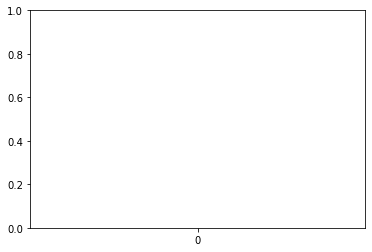

In [9]:
sns.boxplot(df=df[['math score','reading score','writing score']])

In [19]:
Q1_math = df['math score'].quantile(0.25);
Q3_math = df['math score'].quantile(0.75)
IQR_math = Q3_math - Q1_math

print(IQR_math) 

20.0


In [20]:
Q1_reading = df['reading score'].quantile(0.25);
Q3_reading = df['reading score'].quantile(0.75)
IQR_reading = Q3_reading - Q1_reading

print(IQR_reading) 

20.0


In [21]:
Q1_writing = df['writing score'].quantile(0.25);
Q3_writing = df['writing score'].quantile(0.75)
IQR_writing = Q3_writing - Q1_writing

print(IQR_writing) 

21.0


In [22]:
low_math=Q1_math-1.5*IQR_math
high_math=Q3_math+1.5*IQR_math

low_reading=Q1_reading-1.5*IQR_reading
high_reading=Q3_reading+1.5*IQR_reading

low_writing=Q1_writing-1.5*IQR_writing
high_writing=Q3_writing+1.5*IQR_writing

In [23]:
outliers_math = df[(df['math score'] < low_math) | (df['math score'] > high_math)]
outliers_reading = df[(df['reading score'] < low_reading) | (df['reading score'] > high_reading)]
outliers_writing = df[(df['writing score'] < low_writing) | (df['writing score'] > high_writing)]

In [27]:
data_filtered = df[~df.index.isin(outliers_math.index)]
data_filtered2 = data_filtered[~data_filtered.index.isin(outliers_reading.index)]
data_filtered_final = data_filtered2[~data_filtered2.index.isin(outliers_writing.index)]

In [25]:
sns.boxplot(data_filtered_final)

C:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<AxesSubplot:>

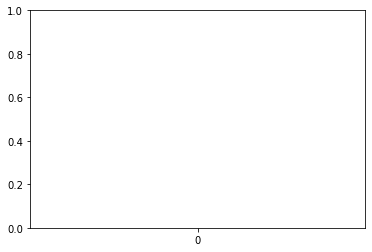

In [29]:
sns.boxplot(df = df[['math score' , 'reading score' , 'writing score']])